In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('D:/dataset/AirPassengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df=pd.read_csv('D:/dataset/AirPassengers.csv', index_col='Month',parse_dates=True)
df.index.freq='MS'

df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
#Train Test Split

In [5]:
train_data=df.iloc[:108]
test_data=df.iloc[108:]

<AxesSubplot:xlabel='Month'>

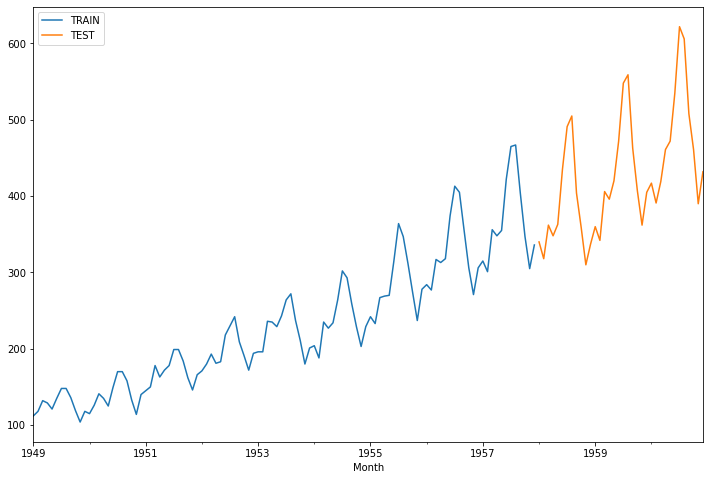

In [6]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

In [7]:
#fitting the model

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
model=ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fit_model=model.fit()

In [10]:
fit_model

In [11]:
#Evaluating Model against Test set

In [12]:
test_prediction=fit_model.forecast(36)

In [13]:
test_prediction

1958-01-01    356.968544
1958-02-01    344.588538
1958-03-01    405.717920
1958-04-01    400.610293
1958-05-01    409.001252
1958-06-01    480.694231
1958-07-01    530.470196
1958-08-01    523.289048
1958-09-01    454.210815
1958-10-01    392.518096
1958-11-01    345.928353
1958-12-01    396.605012
1959-01-01    408.958733
1959-02-01    394.775658
1959-03-01    464.808144
1959-04-01    458.956624
1959-05-01    468.569671
1959-06-01    550.704275
1959-07-01    607.729791
1959-08-01    599.502756
1959-09-01    520.363719
1959-10-01    449.685849
1959-11-01    396.310608
1959-12-01    454.367999
1960-01-01    468.520960
1960-02-01    452.272211
1960-03-01    532.504481
1960-04-01    525.800724
1960-05-01    536.813851
1960-06-01    630.910836
1960-07-01    696.241754
1960-08-01    686.816503
1960-09-01    596.151371
1960-10-01    515.179721
1960-11-01    454.030717
1960-12-01    520.543796
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

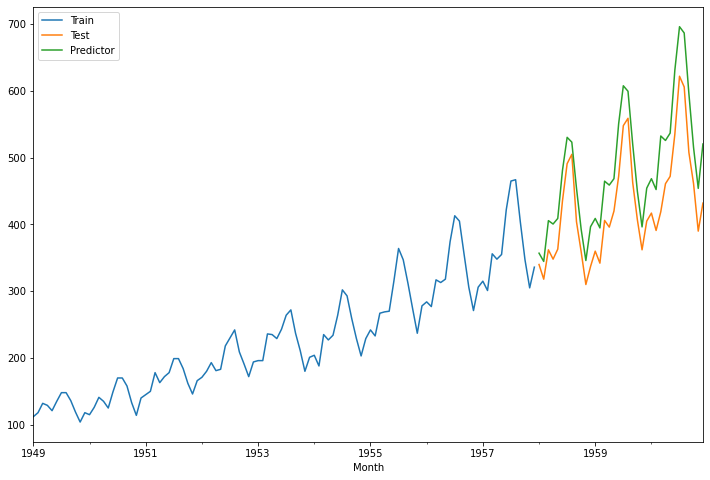

In [14]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='Predictor')

<AxesSubplot:xlabel='Month'>

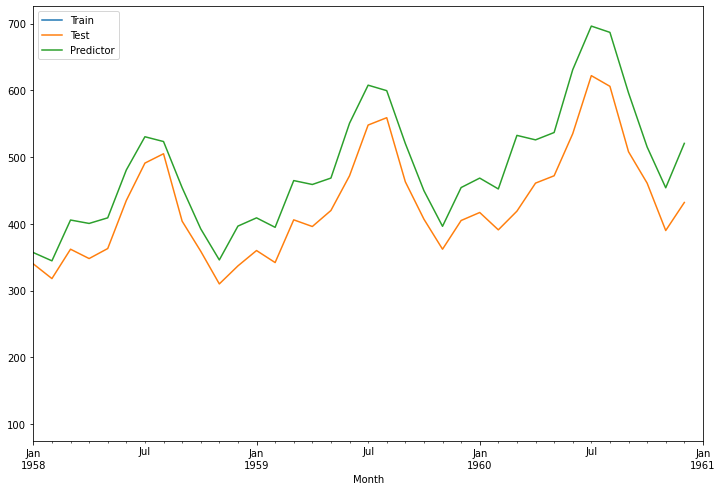

In [15]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='Predictor',xlim=['1958-01-01','1961-01-01'],)

In [16]:
#Evaluation Metrics

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
mean_sqared_error=mean_squared_error(test_data,test_prediction)

In [19]:
np.sqrt(mean_sqared_error)

59.379054894484696

In [20]:
test_data.describe()

,Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [21]:
#forecasting into future

In [22]:
final_model=ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [23]:
final_model

<AxesSubplot:xlabel='Month'>

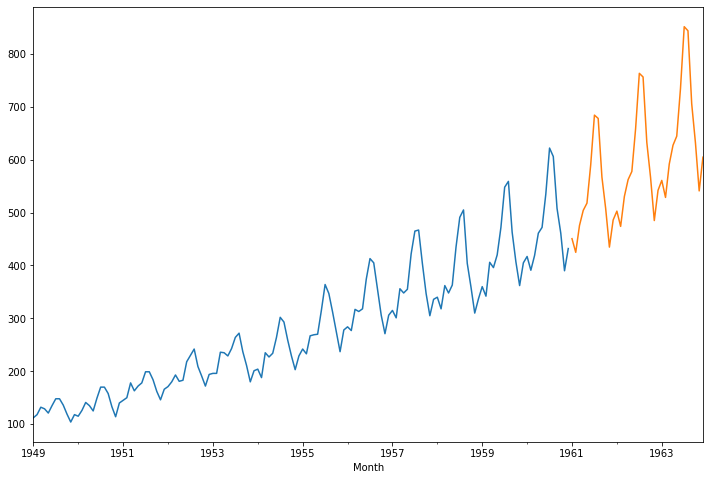

In [26]:
forecast_prediction=final_model.forecast(36)
df['Passengers'].plot(figsize=(12,8))
forecast_prediction.plot()